Part 1 CNN - Classification

In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


8


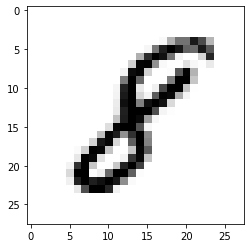

In [ ]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [ ]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                        

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x=x_train,y=y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4015 - accuracy: 0.8882
Epoch 2/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1644 - accuracy: 0.9508
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1157 - accuracy: 0.9657
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0878 - accuracy: 0.9735
Epoch 5/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0712 - accuracy: 0.9783
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0588 - accuracy: 0.9819
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0477 - accuracy: 0.9856
Epoch 8/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0414 - accuracy: 0.9875
Epoch 9/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0362 - accuracy: 0.9888
Epoch 10/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.029

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0546 - accuracy: 0.9861


[0.05462750419974327, 0.9861000180244446]

9


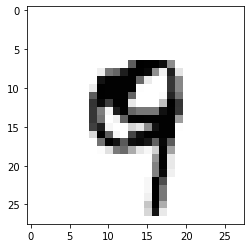

In [ ]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
input1 = x_test[0]
input2 = x_test[1]
pred1 = model.predict(input1.reshape(1, 28, 28, 1))
pred2 = model.predict(input2.reshape(1, 28, 28, 1))


In [ ]:
number1, number2 = pred1.argmax(), pred2.argmax()

In [ ]:
sum = number1 + number2

In [ ]:
def get_digit_index(digit):
  import random
  ind = list()
  for i in enumerate(y_test[0:200]):

    if i[1] == digit:
      ind.append(i[0])
  choice = random.choice(ind)
  return choice


def mnist_digit_print(index1, index2):
  fig = plt.figure(figsize=(1,2))
  plt.subplot(1,2,1)
  plt.imshow(x_test[index1].reshape(28, 28),cmap='Greys')
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(x_test[index2].reshape(28, 28),cmap='Greys')
  plt.axis('off');


def digit2mnist(sum):

  if sum <= 9:
    index1 = get_digit_index(0)
    index2 = get_digit_index(sum)

    mnist_digit_print(index1,index2)

  if sum > 9: 
    index1 = get_digit_index(1)
    index2 = get_digit_index(sum-10)

    mnist_digit_print(index1,index2)


In [ ]:
def mnist_sum(classification_model, input1=x_test[0], input2=x_test[1]):
  pred1 = classification_model.predict(input1.reshape(1, 28, 28, 1))
  pred2 = classification_model.predict(input2.reshape(1, 28, 28, 1))

  number1, number2 = pred1.argmax(), pred2.argmax()

  sum = number1 + number2

  digit2mnist(sum)


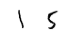

In [ ]:
mnist_sum(model,input1=x_test[100], input2=x_test[20])

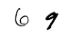

In [ ]:
mnist_digit_print(index1=100, index2=20)

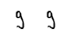

In [ ]:
import random
ind = list()
for i in enumerate(y_train[0:50]):
  
  if i[1] == sum:
    ind.append(i[0])

    #print(i)

choice = random.choice(ind)
#print(choice)


# 2 Fälle: 
# sum <=9, dann ist die erste Ziffer 0
# sum >9 , dann muss die Summe in ihre Bestandteile gesplittet werden.


fig = plt.figure(figsize=(1,2))
plt.subplot(1,2,1)
plt.imshow(x_train[choice].reshape(28, 28),cmap='Greys')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_train[choice].reshape(28, 28),cmap='Greys')
plt.axis('off');

In [ ]:
type(model)

keras.engine.sequential.Sequential

In [ ]:
PATH='/content/drive/MyDrive/DeepLearning/CNN_Classifier'
model.save(PATH)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DeepLearning/CNN_Classifier/assets


In [ ]:
PATH='/content/drive/MyDrive/DeepLearning/CNN_Classifier'
CNN = tf.keras.models.load_model(PATH)

**Part 2: Conditional StyleGAN**

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import torch
from torchvision import transforms, datasets
import torch.nn as nn
from torch import optim as optim

In [ ]:
training_parameters = {
    "n_epochs": 120,
    "batch_size": 100,
}
data_loader = torch.utils.data.DataLoader(
  
  datasets.MNIST('./', train=True, download=True,
                             transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=training_parameters["batch_size"], shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
num_batches = len(data_loader)
print("Number of batches: ",num_batches)

Number of batches:  600


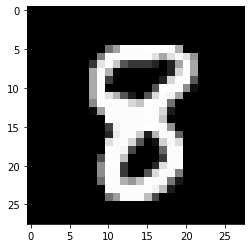

In [ ]:
%matplotlib inline 
from matplotlib import pyplot as plt

for x,_ in data_loader:
    plt.imshow(x.numpy()[0][0], cmap='gray')
    break

In [ ]:
class GeneratorModel(nn.Module):
    def __init__(self):
        super(GeneratorModel, self).__init__()
        input_dim = 100 + 10
        output_dim = 784
        self.label_embedding = nn.Embedding(10, 10)
        
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )
    
    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x,c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)
        return output.to(device)

class DiscriminatorModel(nn.Module):
    def __init__(self):
        super(DiscriminatorModel, self).__init__()
        input_dim = 784 + 10
        output_dim = 1
        self.label_embedding = nn.Embedding(10, 10)

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer3 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )

        self.hidden_layer4 = nn.Sequential(
            nn.Linear(256, output_dim),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        c = self.label_embedding(labels)
        x = torch.cat([x, c], 1)
        output = self.hidden_layer1(x)
        output = self.hidden_layer2(output)
        output = self.hidden_layer3(output)
        output = self.hidden_layer4(output)

        return output.to(device)

discriminator = DiscriminatorModel()
generator = GeneratorModel()
discriminator.to(device)
generator.to(device)

GeneratorModel(
  (label_embedding): Embedding(10, 10)
  (hidden_layer1): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

In [ ]:
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002)
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002)

loss = nn.BCELoss()

In [ ]:
torch.ones(batch_size, dtype = torch.long)

NameError: ignored

[0/120]: loss_d: 0.475, loss_g: 2.355
[1/120]: loss_d: 0.570, loss_g: 1.733
[2/120]: loss_d: 0.513, loss_g: 1.756
[3/120]: loss_d: 0.476, loss_g: 1.800
[4/120]: loss_d: 0.289, loss_g: 2.519
[5/120]: loss_d: 0.245, loss_g: 2.897
[6/120]: loss_d: 0.258, loss_g: 2.918
[7/120]: loss_d: 0.267, loss_g: 2.769
[8/120]: loss_d: 0.289, loss_g: 2.670
Training Steps Completed:  499
7


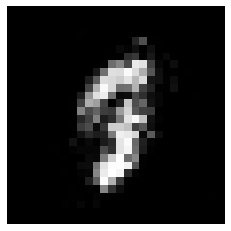

[9/120]: loss_d: 0.288, loss_g: 2.632
[10/120]: loss_d: 0.319, loss_g: 2.364
[11/120]: loss_d: 0.348, loss_g: 2.222
[12/120]: loss_d: 0.358, loss_g: 2.129
[13/120]: loss_d: 0.381, loss_g: 2.017
[14/120]: loss_d: 0.403, loss_g: 1.895
[15/120]: loss_d: 0.394, loss_g: 1.925
[16/120]: loss_d: 0.412, loss_g: 1.844
[17/120]: loss_d: 0.422, loss_g: 1.800
[18/120]: loss_d: 0.425, loss_g: 1.772
Training Steps Completed:  499
1


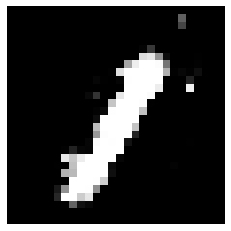

[19/120]: loss_d: 0.436, loss_g: 1.715
[20/120]: loss_d: 0.456, loss_g: 1.626
[21/120]: loss_d: 0.454, loss_g: 1.618
[22/120]: loss_d: 0.465, loss_g: 1.586
[23/120]: loss_d: 0.462, loss_g: 1.615
[24/120]: loss_d: 0.476, loss_g: 1.534
[25/120]: loss_d: 0.492, loss_g: 1.447
[26/120]: loss_d: 0.492, loss_g: 1.454
[27/120]: loss_d: 0.501, loss_g: 1.410
[28/120]: loss_d: 0.503, loss_g: 1.413
Training Steps Completed:  499
2


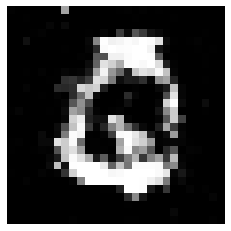

[29/120]: loss_d: 0.503, loss_g: 1.418
[30/120]: loss_d: 0.523, loss_g: 1.315
[31/120]: loss_d: 0.540, loss_g: 1.243
[32/120]: loss_d: 0.547, loss_g: 1.216
[33/120]: loss_d: 0.556, loss_g: 1.187
[34/120]: loss_d: 0.556, loss_g: 1.180
[35/120]: loss_d: 0.556, loss_g: 1.181
[36/120]: loss_d: 0.560, loss_g: 1.171
[37/120]: loss_d: 0.563, loss_g: 1.151
[38/120]: loss_d: 0.578, loss_g: 1.100
Training Steps Completed:  499
2


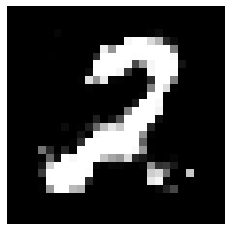

[39/120]: loss_d: 0.577, loss_g: 1.113
[40/120]: loss_d: 0.578, loss_g: 1.098
[41/120]: loss_d: 0.577, loss_g: 1.104
[42/120]: loss_d: 0.584, loss_g: 1.073
[43/120]: loss_d: 0.593, loss_g: 1.044
[44/120]: loss_d: 0.591, loss_g: 1.044
[45/120]: loss_d: 0.594, loss_g: 1.051
[46/120]: loss_d: 0.594, loss_g: 1.047
[47/120]: loss_d: 0.599, loss_g: 1.016
[48/120]: loss_d: 0.610, loss_g: 0.984
Training Steps Completed:  499
2


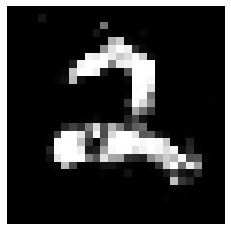

[49/120]: loss_d: 0.610, loss_g: 0.989
[50/120]: loss_d: 0.610, loss_g: 0.982
[51/120]: loss_d: 0.615, loss_g: 0.968
[52/120]: loss_d: 0.611, loss_g: 0.982
[53/120]: loss_d: 0.611, loss_g: 0.981
[54/120]: loss_d: 0.618, loss_g: 0.949
[55/120]: loss_d: 0.615, loss_g: 0.962
[56/120]: loss_d: 0.617, loss_g: 0.962
[57/120]: loss_d: 0.617, loss_g: 0.960
[58/120]: loss_d: 0.622, loss_g: 0.939
Training Steps Completed:  499
6


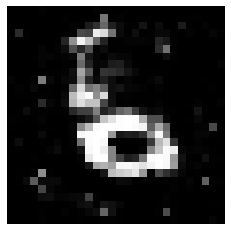

[59/120]: loss_d: 0.620, loss_g: 0.947
[60/120]: loss_d: 0.623, loss_g: 0.941
[61/120]: loss_d: 0.616, loss_g: 0.964
[62/120]: loss_d: 0.617, loss_g: 0.960
[63/120]: loss_d: 0.625, loss_g: 0.928
[64/120]: loss_d: 0.620, loss_g: 0.949
[65/120]: loss_d: 0.624, loss_g: 0.934
[66/120]: loss_d: 0.634, loss_g: 0.904
[67/120]: loss_d: 0.627, loss_g: 0.923
[68/120]: loss_d: 0.628, loss_g: 0.912
Training Steps Completed:  499
1


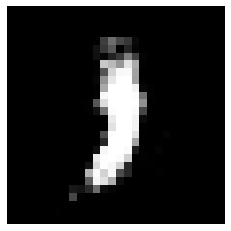

[69/120]: loss_d: 0.634, loss_g: 0.903
[70/120]: loss_d: 0.628, loss_g: 0.918
[71/120]: loss_d: 0.634, loss_g: 0.902
[72/120]: loss_d: 0.636, loss_g: 0.897
[73/120]: loss_d: 0.630, loss_g: 0.907
[74/120]: loss_d: 0.633, loss_g: 0.903
[75/120]: loss_d: 0.631, loss_g: 0.908
[76/120]: loss_d: 0.637, loss_g: 0.888
[77/120]: loss_d: 0.639, loss_g: 0.888
[78/120]: loss_d: 0.636, loss_g: 0.892
Training Steps Completed:  499
1


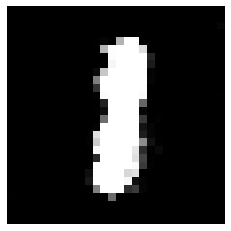

[79/120]: loss_d: 0.637, loss_g: 0.898
[80/120]: loss_d: 0.642, loss_g: 0.872
[81/120]: loss_d: 0.640, loss_g: 0.871
[82/120]: loss_d: 0.645, loss_g: 0.859
[83/120]: loss_d: 0.647, loss_g: 0.855
[84/120]: loss_d: 0.634, loss_g: 0.907
[85/120]: loss_d: 0.641, loss_g: 0.874
[86/120]: loss_d: 0.639, loss_g: 0.881
[87/120]: loss_d: 0.643, loss_g: 0.870
[88/120]: loss_d: 0.648, loss_g: 0.849
Training Steps Completed:  499
2


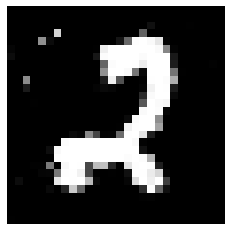

[89/120]: loss_d: 0.649, loss_g: 0.851
[90/120]: loss_d: 0.644, loss_g: 0.874
[91/120]: loss_d: 0.646, loss_g: 0.853
[92/120]: loss_d: 0.646, loss_g: 0.867
[93/120]: loss_d: 0.649, loss_g: 0.847
[94/120]: loss_d: 0.649, loss_g: 0.854
[95/120]: loss_d: 0.647, loss_g: 0.861
[96/120]: loss_d: 0.647, loss_g: 0.863
[97/120]: loss_d: 0.643, loss_g: 0.879
[98/120]: loss_d: 0.643, loss_g: 0.868
Training Steps Completed:  499
2


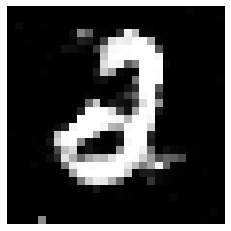

[99/120]: loss_d: 0.644, loss_g: 0.867
[100/120]: loss_d: 0.648, loss_g: 0.854
[101/120]: loss_d: 0.647, loss_g: 0.859
[102/120]: loss_d: 0.647, loss_g: 0.848
[103/120]: loss_d: 0.653, loss_g: 0.838
[104/120]: loss_d: 0.651, loss_g: 0.841
[105/120]: loss_d: 0.658, loss_g: 0.826
[106/120]: loss_d: 0.650, loss_g: 0.845
[107/120]: loss_d: 0.650, loss_g: 0.843
[108/120]: loss_d: 0.656, loss_g: 0.824
Training Steps Completed:  499
5


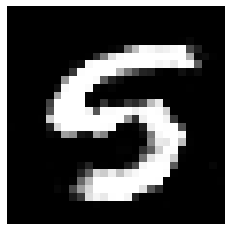

[109/120]: loss_d: 0.657, loss_g: 0.837
[110/120]: loss_d: 0.644, loss_g: 0.866
[111/120]: loss_d: 0.651, loss_g: 0.845
[112/120]: loss_d: 0.648, loss_g: 0.865
[113/120]: loss_d: 0.652, loss_g: 0.845
[114/120]: loss_d: 0.653, loss_g: 0.839
[115/120]: loss_d: 0.657, loss_g: 0.825
[116/120]: loss_d: 0.661, loss_g: 0.810
[117/120]: loss_d: 0.662, loss_g: 0.811
[118/120]: loss_d: 0.658, loss_g: 0.824
Training Steps Completed:  499
6


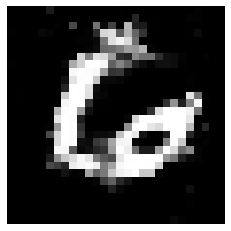

[119/120]: loss_d: 0.651, loss_g: 0.850


In [ ]:
n_epochs = training_parameters["n_epochs"]
batch_size = training_parameters["batch_size"]

for epoch_idx in range(n_epochs):
    G_loss = []
    D_loss = []
    for batch_idx, data_input in enumerate(data_loader):
        
        
        noise = torch.randn(batch_size,100).to(device)
        fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
        generated_data = generator(noise, fake_labels) # batch_size X 784

        
        # Discriminator
        true_data = data_input[0].view(batch_size, 784).to(device) # batch_size X 784
        digit_labels = data_input[1].to(device) # batch_size
        true_labels = torch.ones(batch_size).to(device)
        
        discriminator_optimizer.zero_grad()

        discriminator_output_for_true_data = discriminator(true_data, digit_labels).view(batch_size)
        true_discriminator_loss = loss(discriminator_output_for_true_data, true_labels)

        discriminator_output_for_generated_data = discriminator(generated_data.detach(), fake_labels).view(batch_size)
        generator_discriminator_loss = loss(
            discriminator_output_for_generated_data, torch.zeros(batch_size).to(device)
        )
        discriminator_loss = (
            true_discriminator_loss + generator_discriminator_loss
        ) / 2
        
        discriminator_loss.backward()
        discriminator_optimizer.step()

        D_loss.append(discriminator_loss.data.item())
        
        
        # Generator

        generator_optimizer.zero_grad()
        # It's a choice to generate the data again
        generated_data = generator(noise, fake_labels) # batch_size X 784
        discriminator_output_on_generated_data = discriminator(generated_data, fake_labels).view(batch_size)
        generator_loss = loss(discriminator_output_on_generated_data, true_labels)
        generator_loss.backward()
        generator_optimizer.step()
        
        G_loss.append(generator_loss.data.item())
        if ((batch_idx + 1)% 500 == 0 and (epoch_idx + 1)%10 == 0):
            print("Training Steps Completed: ", batch_idx)
            
            with torch.no_grad():
                noise = torch.randn(batch_size,100).to(device)
                fake_labels = torch.randint(0, 10, (batch_size,)).to(device)
                generated_data = generator(noise, fake_labels).cpu().view(batch_size, 28, 28)
                for x in generated_data:
                    print(fake_labels[0].item())
                    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
                    plt.axis('off')
                    plt.show()

                    break


    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
            (epoch_idx), n_epochs, torch.mean(torch.FloatTensor(D_loss)), torch.mean(torch.FloatTensor(G_loss))))

In [ ]:
generator(noise, fake_labels).cpu().view(batch_size, 28, 28)

tensor([[[-0.9996, -0.9970, -0.9996,  ..., -0.9994, -0.9993, -0.9973],
         [-0.9979, -0.9978, -0.9971,  ..., -0.9992, -0.9973, -0.9921],
         [-0.9978, -0.9978, -0.9995,  ..., -0.9987, -0.9975, -0.9986],
         ...,
         [-0.9981, -0.9997, -0.9994,  ..., -0.9897, -0.9947, -0.9924],
         [-0.9987, -0.9981, -0.9973,  ..., -0.9974, -0.9990, -0.9996],
         [-0.9990, -0.9973, -0.9985,  ..., -0.9961, -0.9978, -0.9990]],

        [[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -0.9995],
         [-0.9929, -1.0000, -0.9999,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9998, -1.0000, -0.9993,  ..., -0.9975, -0.9998, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -0.9988, -1.0000],
         [-1.0000, -0.9999, -1.0000,  ..., -0.9999, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -0.9960, -0.9999]],

        [[-1.0000, -0.9969, -1.0000,  ..., -0.9999, -0.9999, -0.9998],
         [-1.0000, -0.9998, -0.9999,  ..., -0

0


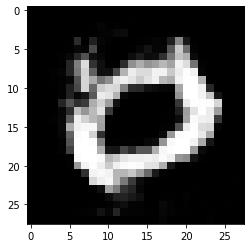

In [ ]:
generated_data = generator(noise, fake_labels).cpu().view(batch_size, 28, 28)
for x in generated_data:
    print(fake_labels[0].item())
    plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
    plt.show()

    break

In [ ]:
fake_labels

tensor([0, 7, 6, 4, 3, 1, 9, 9, 3, 5, 1, 2, 5, 9, 0, 8, 4, 0, 9, 4, 2, 9, 9, 4,
        5, 8, 0, 8, 4, 3, 1, 4, 9, 3, 7, 8, 0, 3, 5, 3, 0, 0, 2, 9, 7, 5, 7, 5,
        9, 5, 5, 2, 7, 2, 5, 0, 7, 9, 7, 5, 1, 2, 8, 7, 8, 0, 8, 7, 3, 9, 9, 5,
        9, 3, 2, 0, 7, 1, 4, 5, 2, 8, 4, 7, 5, 0, 5, 0, 1, 0, 0, 0, 0, 6, 1, 3,
        3, 6, 9, 1], device='cuda:0')

In [ ]:
fake_labels2= torch.tensor([0,1,2,3,4,5,6,7,8,9]).to(device)
fake_labels2
noise2 = torch.randn(10,100).to(device)

In [ ]:
generated_data = generator(noise2, fake_labels2).cpu().view(10, 28, 28)

9


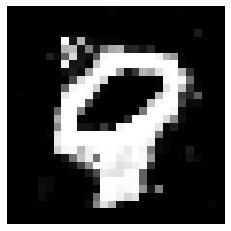

In [ ]:
i= 9
x = generated_data[i]
print(i)
plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
plt.axis('off')
plt.show()




In [ ]:
PATH = "/content/drive/MyDrive/DeepLearning/coStyleGAN2.pt"
torch.save(generator, PATH)

In [ ]:
model = torch.load(PATH)
model.eval()

GeneratorModel(
  (label_embedding): Embedding(10, 10)
  (hidden_layer1): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

In [ ]:
generated_data2 = model(noise2, fake_labels2).cpu().view(10, 28, 28)

3


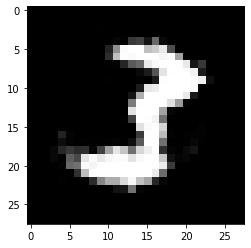

In [ ]:
i= 3
x = generated_data2[i]
print(i)
plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
plt.show()

**Zusammenführung von CNN und conditional StyleGAN**

In [ ]:
PATH='/content/drive/MyDrive/DeepLearning/CNN_Classifier'
CNN = tf.keras.models.load_model(PATH)

In [ ]:
PATH = "/content/drive/MyDrive/DeepLearning/coStyleGAN2.pt"
generator_model = torch.load(PATH)
generator_model.eval()

GeneratorModel(
  (label_embedding): Embedding(10, 10)
  (hidden_layer1): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer2): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer3): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden_layer4): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

In [ ]:
input1 = x_test[0]
input2 = x_test[1]
pred1 = CNN.predict(input1.reshape(1, 28, 28, 1))
pred2 = CNN.predict(input2.reshape(1, 28, 28, 1))
number1, number2 = pred1.argmax(), pred2.argmax()

In [ ]:
number1, number2

(7, 2)

In [ ]:
sum = number1 + number2
sum

9

In [ ]:
def generate_mnist(generator=generator_model,num_to_gen=0):
  fake_labels2= torch.tensor([int(num_to_gen)]).to(device)
  fake_labels2
  noise2 = torch.randn(1,100).to(device)

  generated_data = generator(noise2, fake_labels2).cpu().view(1, 28, 28)

  return generated_data[0]


In [ ]:
def plot_mnist(generated_data):
  plt.imshow(generated_data.detach().numpy(), interpolation='nearest',cmap='gray')
  plt.axis('off')
  plt.show()


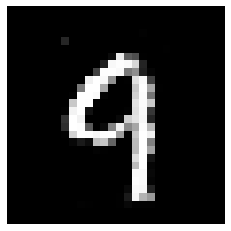

In [ ]:
x=generate_mnist(num_to_gen=9)

plot_mnist(x)


In [ ]:
def mnist_digit_print(output1, output2,output_mode=True):
  if output_mode == True:
    fig = plt.figure(figsize=(1,2))
    plt.subplot(1,2,1)
    plt.imshow(output1.detach().numpy(), interpolation='nearest',cmap='gray')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(output2.detach().numpy(), interpolation='nearest',cmap='gray')
    plt.axis('off');

  if output_mode == False:
    fig = plt.figure(figsize=(1,2))
    plt.subplot(1,2,1)
    plt.imshow(output1.reshape(28, 28),cmap='Greys')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(output2.reshape(28, 28),cmap='Greys')
    plt.axis('off');


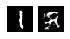

In [ ]:
x1=generate_mnist(num_to_gen=1)
x2=generate_mnist(num_to_gen=9)
mnist_digit_print(x1,x2)

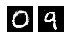

In [ ]:
def print_sum(sum):
  if sum <=9:
    x1=generate_mnist(num_to_gen=0)
    x2=generate_mnist(num_to_gen=sum)
    mnist_digit_print(x1,x2)
  if sum >10:
    x1=generate_mnist(num_to_gen=1)
    x2=generate_mnist(num_to_gen=sum-10)
    mnist_digit_print(x1,x2)


In [ ]:
def mnist_sum(classification_model, input1=x_test[0], input2=x_test[1]):
  pred1 = classification_model.predict(input1.reshape(1, 28, 28, 1))
  pred2 = classification_model.predict(input2.reshape(1, 28, 28, 1))

  number1, number2 = pred1.argmax(), pred2.argmax()

  sum = number1 + number2

  print_sum(sum)

**Beispiel**

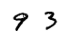

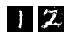

In [ ]:
index1=9
index2=30
mnist_digit_print(output1=x_test[index1],output2=x_test[index2],output_mode=False)
mnist_sum(CNN,input1=x_test[index1], input2=x_test[index2])